# Dados Financeiros e Pré-processamento

## Bibliotecas necessárias

In [16]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import warnings

In [17]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

## Obtendo dados do Yahoo Finance

In [2]:
df_magalu = yf.download('MGLU3.SA', start='2012-01-01', end='2021-12-31', progress=False)

In [3]:
df_magalu.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,0.296562,0.296562,0.290625,0.290625,0.261855,8681600
2012-01-03,0.293750,0.295312,0.288750,0.288750,0.260165,23385600
2012-01-04,0.289687,0.289687,0.283125,0.285937,0.257631,19008000
2012-01-05,0.286250,0.286250,0.282812,0.283437,0.255378,7024000
2012-01-06,0.283750,0.291250,0.279687,0.291250,0.262418,19286400


In [4]:
df_magalu.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-23,6.22,6.34,5.99,6.20,6.20,97106100
2021-12-27,6.23,6.78,6.23,6.78,6.78,124279800
2021-12-28,6.79,6.96,6.64,6.83,6.83,165573900
2021-12-29,6.84,6.90,6.70,6.76,6.76,79247400
2021-12-30,6.80,7.41,6.77,7.22,7.22,180329400


## Convertendo preços em retornos

* Retorno simples: $$R_t = \dfrac{P_t - P_{t-1}}{P_t}$$

* Retorno logarítmico: $$r_t = \log(P_t/P_{t-1}) = \log(P_t) - \log(P_{t-1})$$

In [55]:
df = df_magalu.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [56]:
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

In [57]:
df.head()

,adj_close,simple_rtn,log_rtn
Date,,,
2012-01-02,0.261855,NaN,NaN
2012-01-03,0.260165,-0.006451,-0.006472
2012-01-04,0.257631,-0.009742,-0.009790
2012-01-05,0.255378,-0.008743,-0.008782
2012-01-06,0.262418,0.027565,0.027192


## Mudança de frequência

* Multiplicar/dividir os retornos logarítmicos pelo número de períodos de tempo.

* Multiplicar/dividor a volatilidade pela raiz quadrada do número de períodos.

Fórmula da volatilidade realizada: $$RV = \sqrt{\sum_{i=1}^T r_t^2}$$

In [58]:
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

In [59]:
df2 = df.loc[:, ['log_rtn']]
df2.head()

,log_rtn
Date,
2012-01-02,NaN
2012-01-03,-0.006472
2012-01-04,-0.009790
2012-01-05,-0.008782
2012-01-06,0.027192


In [60]:
df_rv = df2.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn': 'rv'}, inplace=True)

Volatilidade Anualizada:

In [61]:
df_rv.rv = df_rv.rv * np.sqrt(12)

Gráficos:

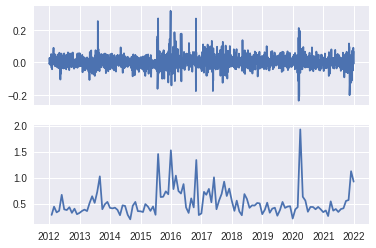

In [62]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df2)
ax[1].plot(df_rv)
plt.show()

## Fatos estilizados

In [28]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

### Distribuição não gaussiana de retornos

In [64]:
df.dropna(inplace=True)

In [66]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num = 1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

Gráfico

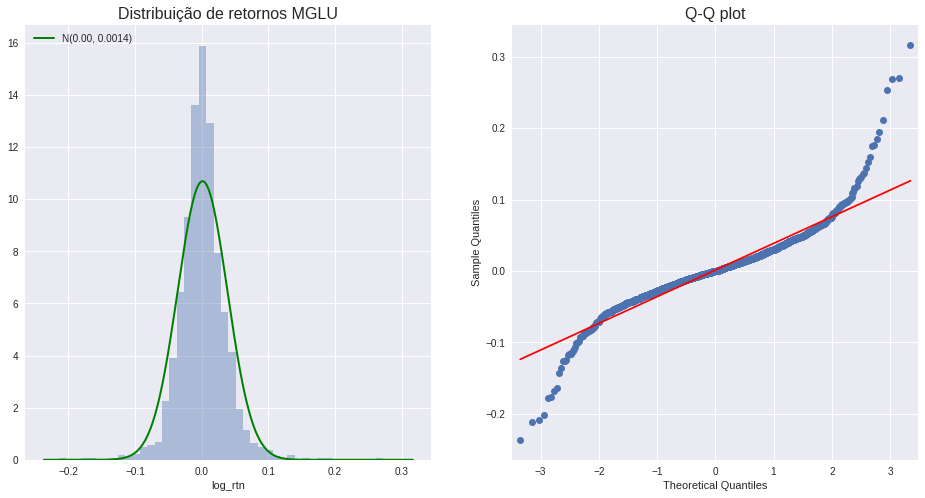

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribuição de retornos MGLU', fontsize=16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2, label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left')


# Q-Q Plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize=16)
plt.show()

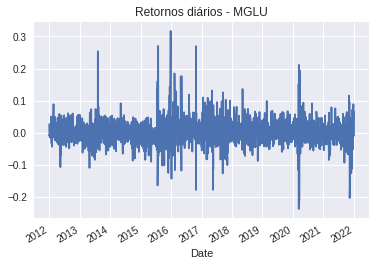

In [73]:
df.log_rtn.plot(title='Retornos diários - MGLU')
plt.show()